In [3]:
import urllib


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
num_samples=100
np.random.seed(1234)


In [9]:
# Generate synthetic data
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,10,size=num_samples)
    y = 3.65*X + 10 + random_noise # add some noise
    return X, y

In [10]:
# Generate random (linear) data
X, y = generate_data(num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()


,X,y
0,0.0,5.108663
1,1.0,10.834965
2,2.0,8.955784
3,3.0,14.562103
4,4.0,33.964943


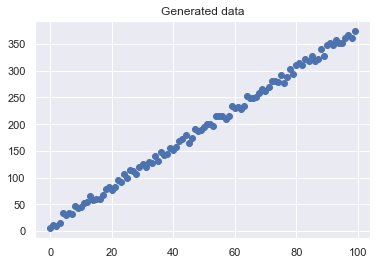

In [13]:
sns.set()
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [14]:
# Import packages
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
train_size=0.75
test_size=0.25
num_epochs=100
seed=1234
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=test_size, 
    random_state=seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


In [18]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# Check
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

mean: [8.22952817e-17] 2.4739469732063907e-16
std: [1.] 1.0


In [20]:
# Initialize the model
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=num_epochs)

In [21]:
# Train
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='none', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [23]:

import matplotlib.pyplot as plt

In [24]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 55.96, test_MSE: 48.92


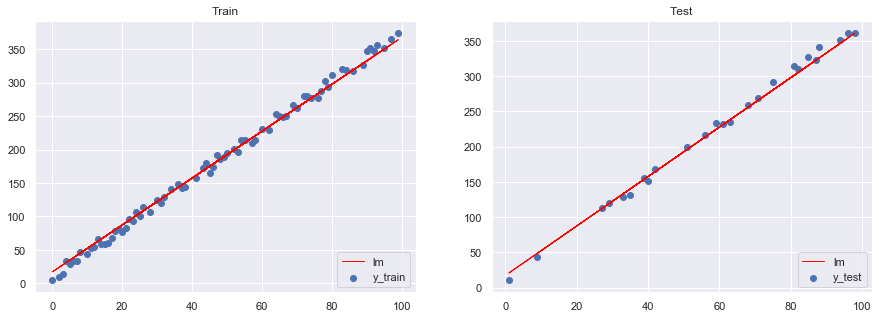

In [25]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Show plots
plt.show()

In [26]:
# Feed in your own inputs
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[17.22826754 20.73461621 24.24096488]


,X,y
0,0.0,5.108663
1,1.0,10.834965
2,2.0,8.955784


In [27]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.50635159]
[17.22826958]


In [29]:
# Initialize the model with L2 regularization
lm = SGDRegressor(loss="squared_loss", penalty='l2', alpha=1e-2, 
                  max_iter=# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_num_epochs)

In [30]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 55.96, test_MSE: 48.92


In [33]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10


AttributeError: 'SGDRegressor' object has no attribute 'coef_'

In [34]:
# Create data with categorical features
cat_data = pd.DataFrame(['a', 'b', 'c', 'a'], columns=['favorite_letter'])
cat_data.head()

,favorite_letter
0,a
1,b
2,c
3,a


In [35]:
dummy_cat_data = pd.get_dummies(cat_data)
dummy_cat_data.head()

,favorite_letter_a,favorite_letter_b,favorite_letter_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
